In [10]:
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df = pd.read_csv('Trucks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  24 non-null     int64
 1   Freq        24 non-null     int64
 2   period      24 non-null     int64
 3   parked      24 non-null     int64
 4   light       24 non-null     int64
 5   collision   24 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Freq       24 non-null     int64
 1   period     24 non-null     int64
 2   parked     24 non-null     int64
 3   light      24 non-null     int64
 4   collision  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq,24.0,1448.916667,2794.132578,39.0,188.75,536.5,994.75,10749.0
period,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
parked,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
light,24.0,0.333333,0.481543,0.0,0.00,0.0,1.00,1.0
collision,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0


In [26]:
df.collision.value_counts()

1    12
0    12
Name: collision, dtype: int64

In [11]:
lda = LinearDiscriminantAnalysis()

In [13]:
x = df.drop('collision', axis=1)
y = df.collision

In [14]:
lda.fit(x, y)

LinearDiscriminantAnalysis()

In [27]:
lda.priors_

array([0.5, 0.5])

In [15]:
pred = lda.predict(x)

In [16]:
lda.score(x,y)

0.5833333333333334

In [17]:
metrics.confusion_matrix(y, pred)

array([[8, 4],
       [6, 6]], dtype=int64)

In [18]:
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



In [29]:
intercept = lda.score

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'score_'

In [28]:
intercept

<bound method ClassifierMixin.score of LinearDiscriminantAnalysis()>

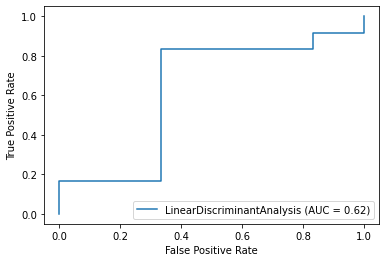

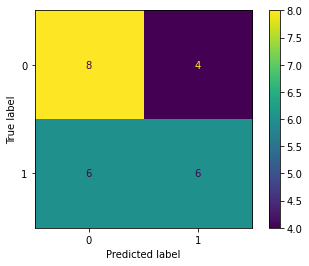

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,recall_score, accuracy_score
plot_roc_curve(lda,x,y)
plot_confusion_matrix(lda,x,y)